<a href="https://colab.research.google.com/github/sriharsha1718/Pytorch/blob/main/Pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Implementing ANN using Pytorch
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [3]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pima-indians-diabetes-database.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
import seaborn as sns
import numpy as np
df['Outcome'] = np.where(df['Outcome']==1, 'Diabetic', 'Non Diabetic')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


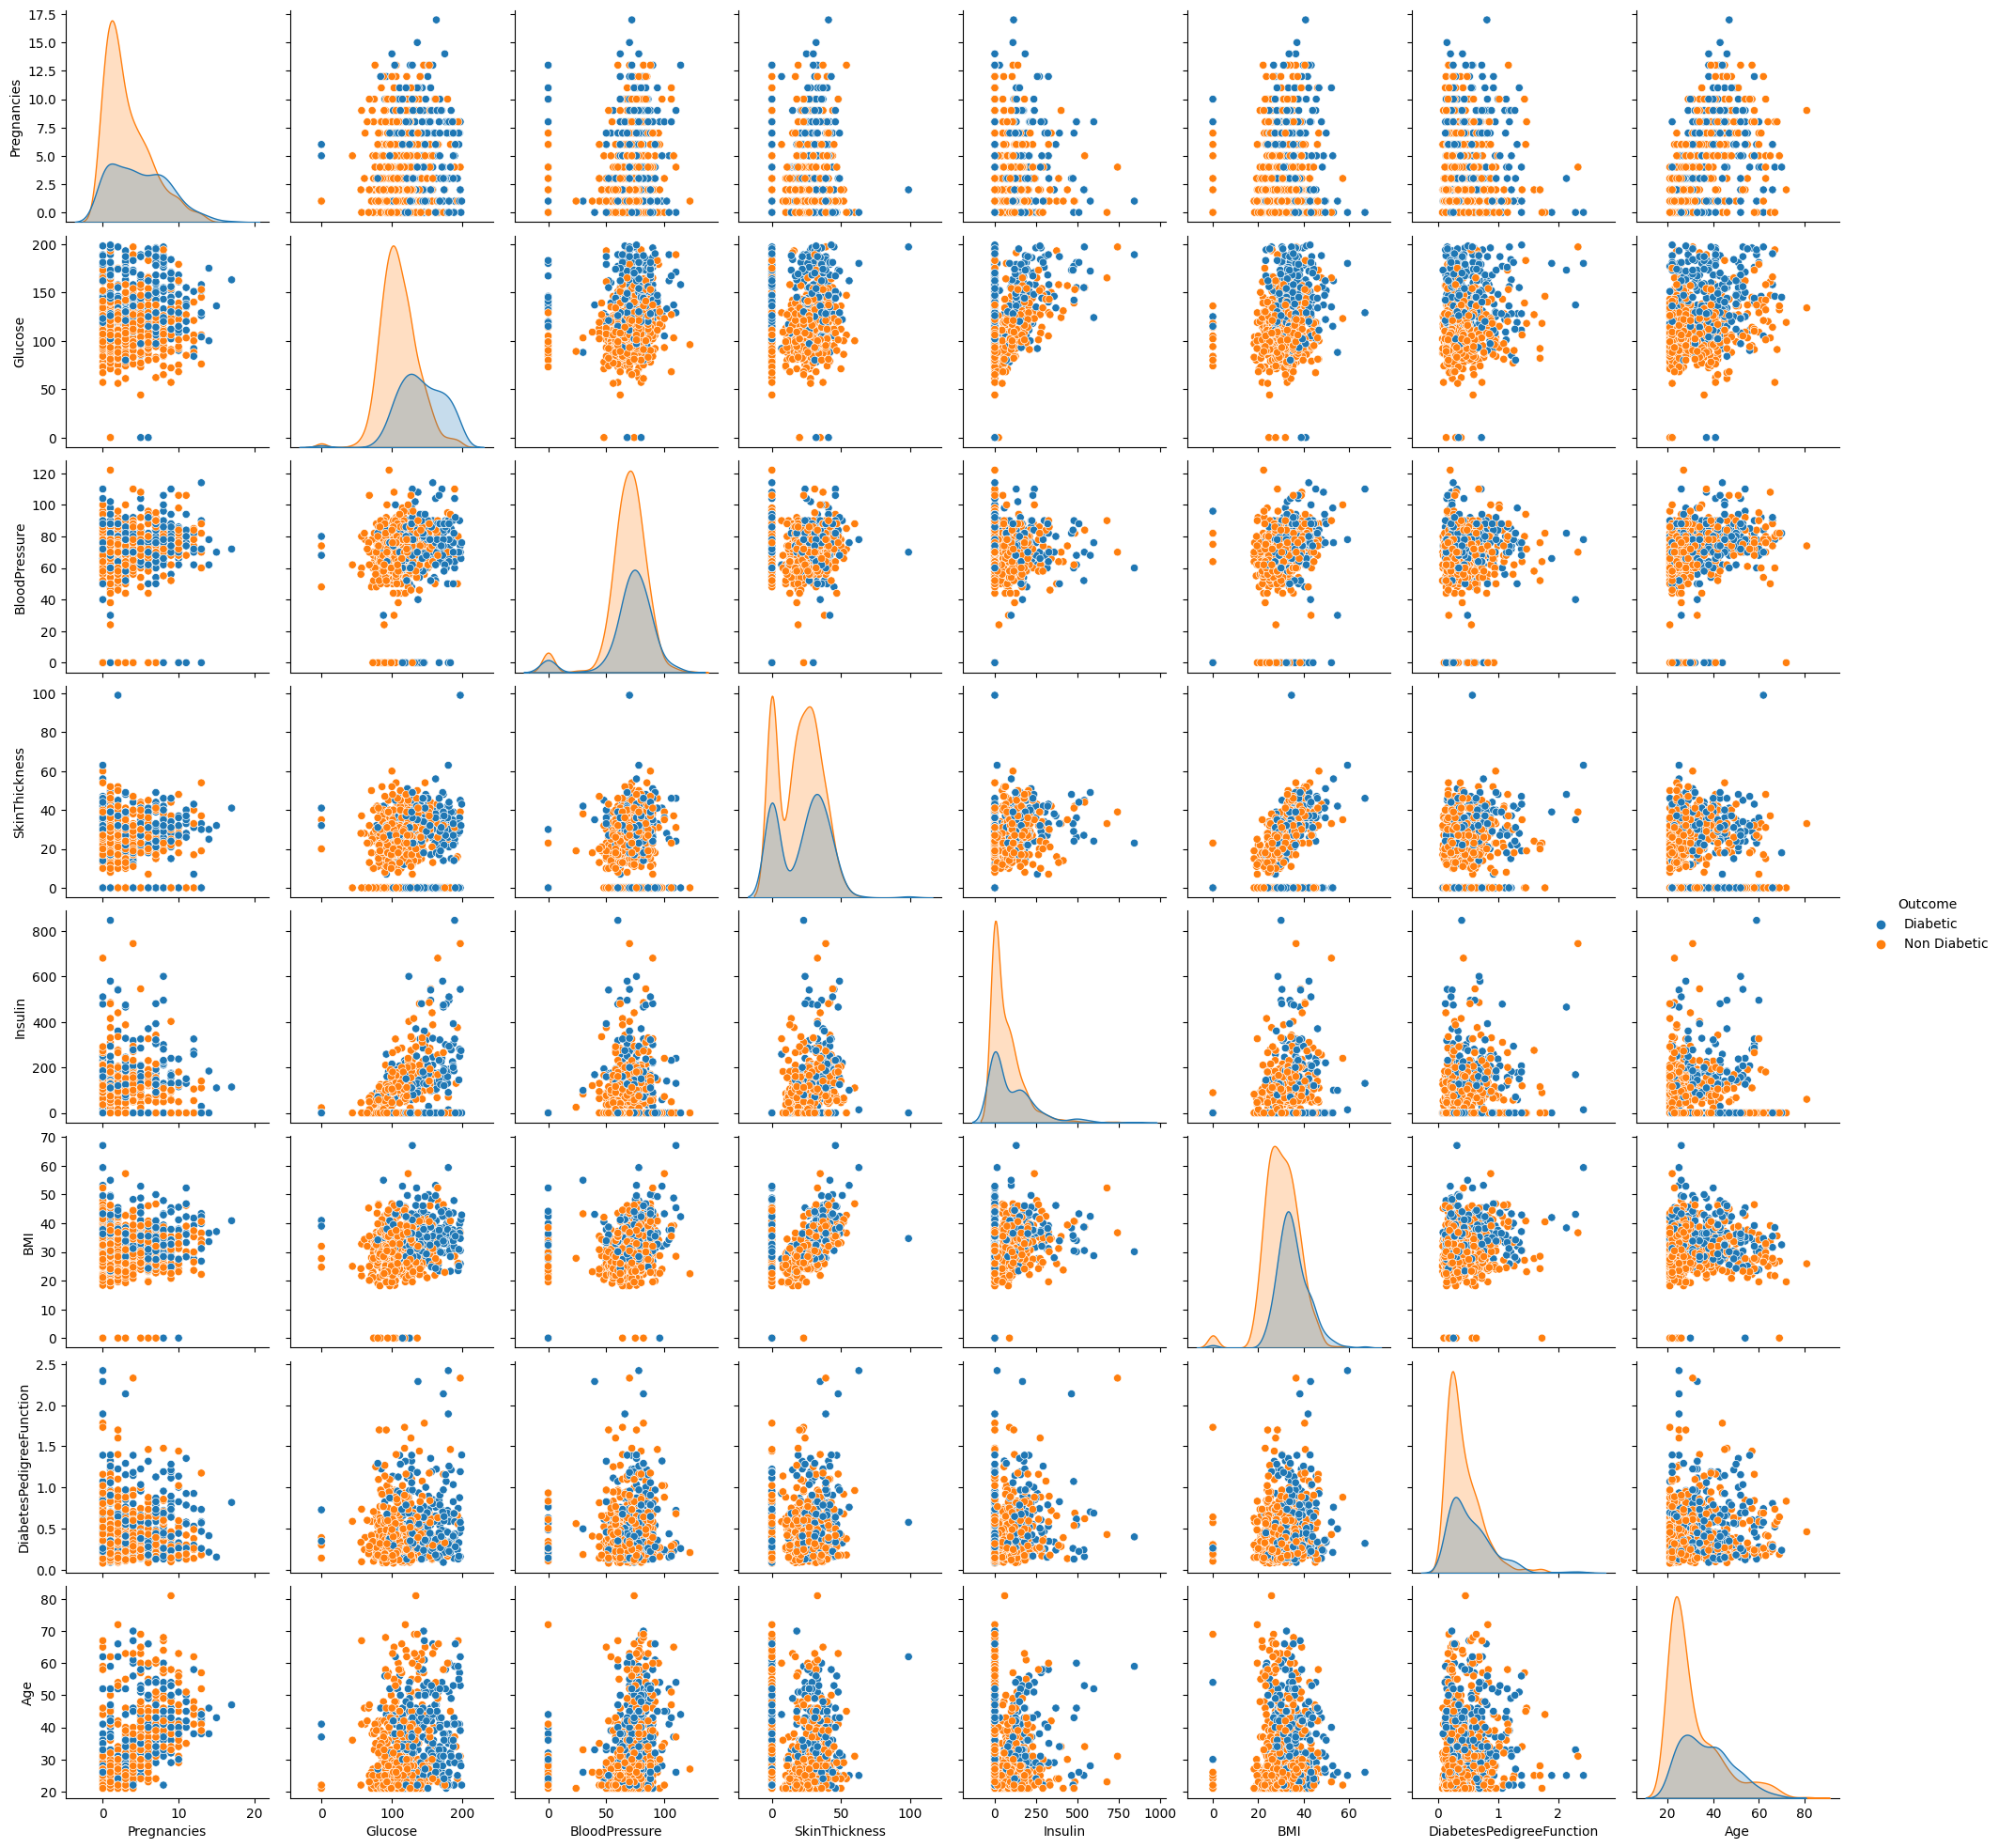

In [9]:
sns.pairplot(df, hue='Outcome')

In [10]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [13]:
#Creating Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
df.shape

(768, 9)

In [15]:
#Creating Model with Pytorch

class ANN_Model(nn.Module):

    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):

        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [16]:
#Instantiate ANN_Model
torch.manual_seed(20)
model = ANN_Model()

In [17]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [18]:
model.parameters()

<generator object Module.parameters at 0x7d7623450f90>

In [19]:
#Backward Propagation -- Define the loss function and Define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
epochs=500
final_losses=[]
for i in range(1, epochs):
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019208312034607
Epoch number: 21 and the loss : 0.6090322136878967
Epoch number: 31 and the loss : 0.5917770266532898
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135971903800964
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.49834102392196655
Epoch number: 121 and the loss : 0.4960551857948303
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4756035804748535
Epoch number: 151 and the loss : 0.48334649205207825
Epoch number: 161 and the loss : 0.4882740080356598
Epoch number: 171 and the loss : 0.4693370461463928
Epoch number: 181 and the loss : 0.46626102924346924
Epoch number: 191 a

In [21]:
#Plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
final_losses[:4]

[tensor(3.4572, grad_fn=<NllLossBackward0>),
 tensor(1.7547, grad_fn=<NllLossBackward0>),
 tensor(1.4100, grad_fn=<NllLossBackward0>),
 tensor(0.9452, grad_fn=<NllLossBackward0>)]

Text(0.5, 0, 'Epoch')

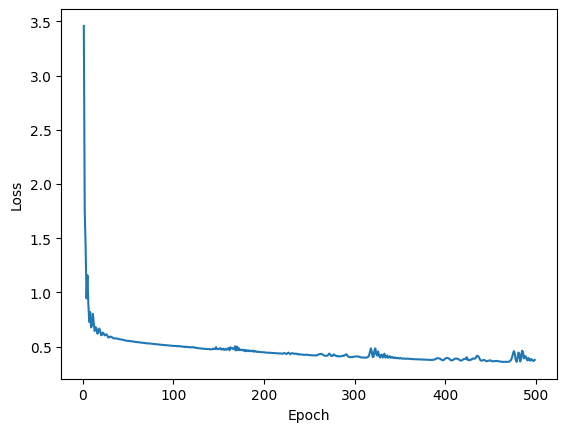

In [23]:
plt.plot(range(1,epochs), [loss.detach().numpy() for loss in final_losses])
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [24]:
#Prediction on X_test data
predictions = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
1
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[94, 13],
       [20, 27]])

Text(95.72222222222221, 0.5, 'Predictions')

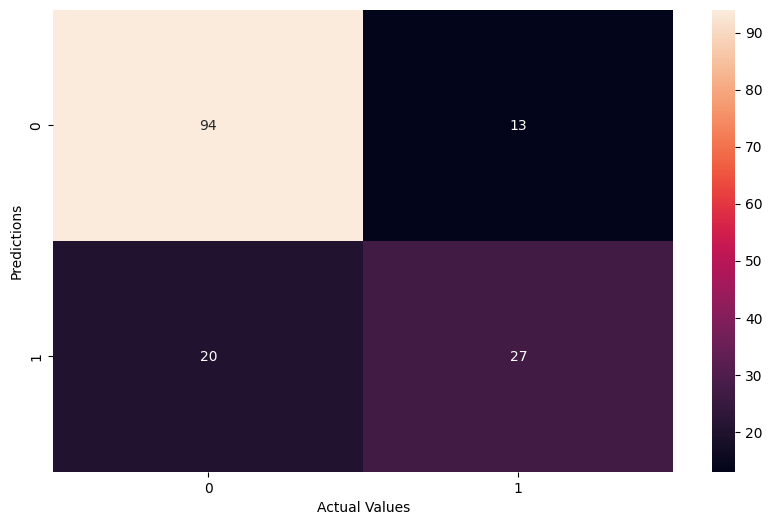

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

In [27]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, predictions)
print(score)

0.7857142857142857


In [28]:
#Save and Load the Model
torch.save(model, 'diabetes.pt')

In [29]:
model=torch.load('/content/diabetes.pt')

In [30]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [31]:
#Prediction of new data point
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [32]:
#New data
lst1 = [6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]
new_data = torch.tensor(lst1)

In [33]:
with torch.no_grad():
  print(model(new_data))
  print(y_pred.argmax().item())

tensor([1.5778, 0.9310])
0
